<a href="https://colab.research.google.com/github/Ucet786/hello-world/blob/master/object_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import requests
import io
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.patches as patches
#import urllib2
from PIL import Image
import IPython

In [0]:
path_to_input_image = '/content/drive/My Drive/IMG-20181203-WA0014 (1).jpg'

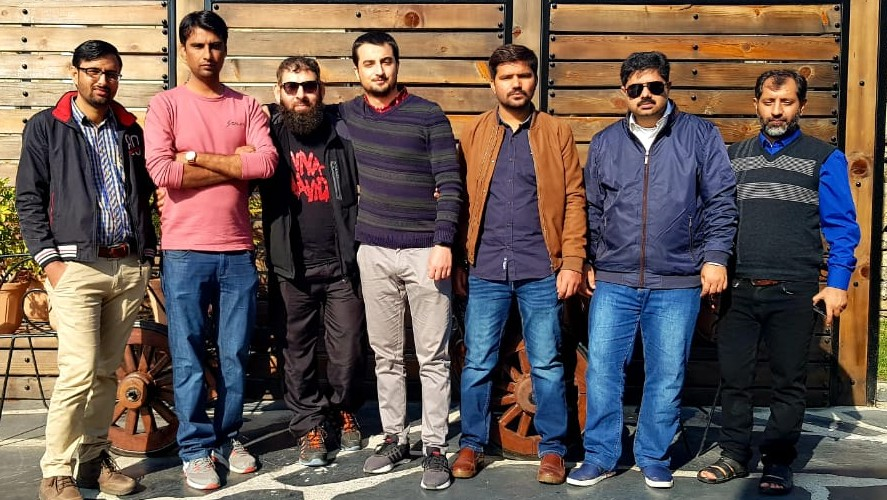

In [8]:
url = 'http://max-object-detector.max.us-south.containers.appdomain.cloud/'
model_endpoint =  'model/predict'
complete_url = url + model_endpoint
with open(path_to_input_image, 'rb') as file:
    file_form = {'image': (path_to_input_image, file, 'image/jpeg')}
    # Post the image to the rest API using the requests library
    r = requests.post(url=complete_url, files=file_form)
    # Return the JSON
    response = r.json()

IPython.display.Image(path_to_input_image, width = 450)

In [0]:
image = Image.open(path_to_input_image)

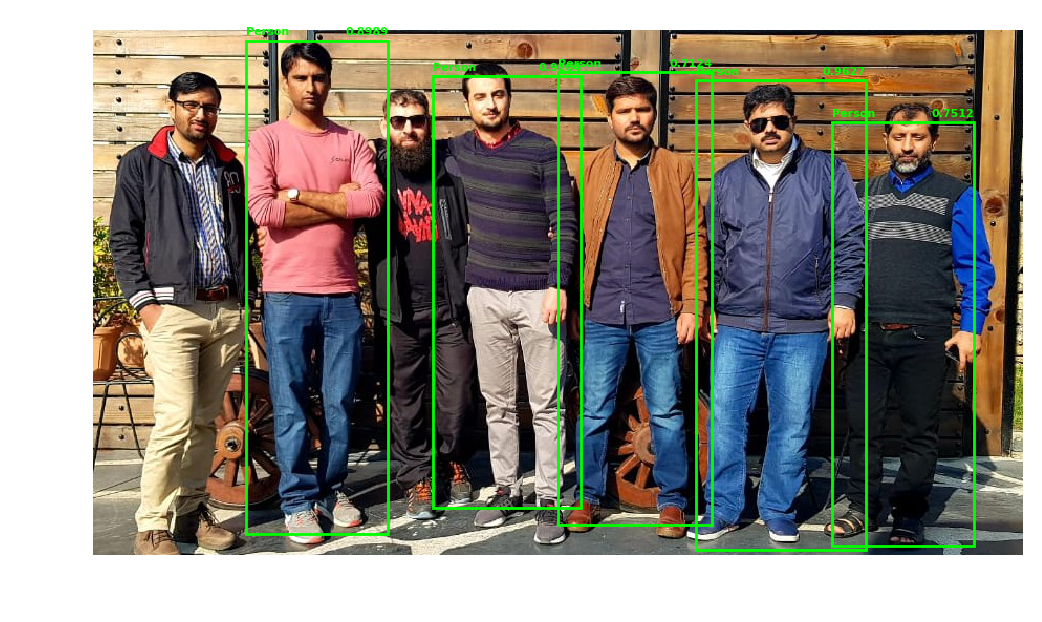

In [10]:
# Get the image height and width
image_width, image_height = image.size
# Create figure and axes
fig, ax = plt.subplots()
# Set larger figure size
fig.set_dpi(200)
# Display the image
plt.imshow(image)

# Set up the color of the bounding boxes and text
color = '#00FF00'
# For each object, draw the bounding box and predicted class together with the probability
for prediction in response['predictions']:
    bbox = prediction['detection_box']
    # Unpack the coordinate values
    y1, x1, y2, x2 = bbox
    # Map the normalized coordinates to pixel values: scale by image height for 'y' and image width for 'x'
    y1 *= image_height
    y2 *= image_height
    x1 *= image_width
    x2 *= image_width
    # Format the class probability for display
    probability = '{0:.4f}'.format(prediction['probability'])
    # Format the class label for display
    label = '{}'.format(prediction['label'])
    label = label.capitalize()
    # Create the bounding box rectangle - we need the base point (x, y) and the width and height of the rectangle
    rectangle = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor=color, facecolor='none')
    ax.add_patch(rectangle)
    # Plot the bounding boxes and class labels with confidence scores
    plt.text(x1, y1-5, label, fontsize=4, color=color, fontweight='bold',horizontalalignment='left')
    plt.text(x2, y1-5, probability, fontsize=4, color=color, fontweight='bold',horizontalalignment='right')
plt.axis('off')
plt.show()